<a href="https://colab.research.google.com/github/tanmaybohra/Appliances-Energy-Prediction/blob/main/Energy_Prediction_Before_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

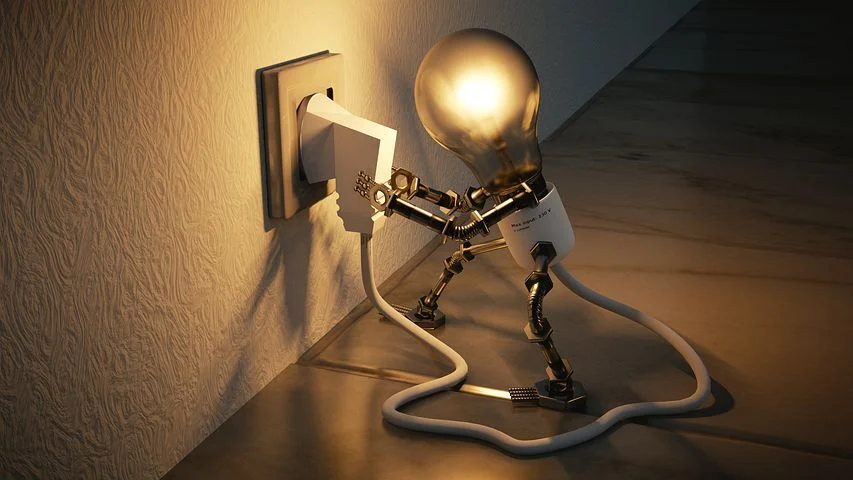

**Appliance Energy Prediction**

In this time of global uncertainty world needs energy and in increasing quantities to support economic and social progress and build a better quality of life, in particular in developing countries. But even in today’s time there are many places especially in developing world where there are outages. These outages are primary because of excess load consumed by appliances at home. Heating and cooling appliances takes most power in house. In this project we will be analysing the appliance usage in the house gathered via home sensors. All readings are taken at 10 mins intervals for 4.5 months . The goal is to predict energy consumption by appliances .
In the age of smart homes, ability to predict energy consumption can not only save money for end user but can also help in generating money for user by giving excess energy back to Grid (in case of solar panels usage). In this case regression analysis will be used to predict Appliance energy usage based on data collected from various sensors. 

**Problem Statement**

We should predict Appliance energy consumption for a house based on factors like temperature, humidity & pressure . In order to achieve this, we need to develop a supervised learning model using regression algorithms. Regression algorithms are used as data consist of continuous features and there are no identification of appliances in dataset

**Attribute Information**

1. ***date*** time year-month-day hour:minute:second

2. ***Appliances***, energy use in Wh (**Dependent variable**)

3. ***lights***, energy use of light fixtures in the house in Wh (Drop this column)

4. ***T1***, Temperature in kitchen area, in Celsius

5. ***RH1***, Humidity in kitchen area, in % 

6. ***T2***, Temperature in living room area, in Celsius 

7. ***RH2***,Humidity in living room area, in %

8. ***T3***, Temperature in laundry room area

9. ***RH3***, Humidity in laundry room area, in % 

10. ***T4***, Temperature in office room, in Celsius 

11. ***RH4***,Humidity in office room, in %

12. ***T5***, Temperature in bathroom, in Celsius

13. ***RH5***, Humidity in bathroom, in % 

14. ***T6***, Temperature outside the building (north side), in Celsius

15. ***RH6***, Humidity outside the building (north side), in %

16. ***T7***, Temperature in ironing room , in Celsius

17. ***RH7***, Humidity in ironing room, in % 

18. ***T8***, Temperature in teenager room 2, in Celsius 

19. ***RH8***,Humidity in teenager room 2, in %


20. ***T9***, Temperature in parents room, in Celsius

21. ***RH9***, Humidity in parents room, in % 

22. ***To***, Temperature outside (from Chievres weather station), in
Celsius 

23. ***Pressure*** (from Chievres weather station), in mm Hg 

24. ***RHout***, Humidity outside (from
Chievres weather station), in %

25. ***Wind speed*** (from Chievres weather station), in m/s

26. ***Visibility*** (from Chievres weather station), in km

27. ***Tdewpoint*** (from Chievres weather station), Â°C

28. ***rv1***, Random variable 1, nondimensional

29. ***rv2***, Random variable 2, nondimensional


In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Reading the data**

In [3]:
file_path = ('/content/drive/MyDrive/Copy of data_application_energy.csv')
df = pd.read_csv(file_path)

#  **Data Exploration**

In [4]:
df.shape

(19735, 29)

Number of instances: 19,735

Number of attributes: 29

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
# #Number of null values in all columns

df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

As shown above , there are no null values in the dataset

In [7]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [8]:
temp = {
    'T1' : 'kitchen_temp', 'T2' : 'living_temp', 'T3' : 'laundry_temp', 
    'T4' : 'office_temp', 'T5' : 'bath_temp', 'T6' : 'outside_temp',
    'T7' : 'ironing_temp', 'T8' : 'teen_temp', 'T9' : 'parents_temp', 'T_out' : 'station_temp'
  }

In [9]:
energy = df.rename(columns=temp)

In [10]:
humid = {
    'RH_1' : 'kitchen_humid', 'RH_2' : 'living_humid', 'RH_3' : 'laundry_humid', 
    'RH_4' : 'office_humid', 'RH_5' : 'bath_humid', 'RH_6' : 'outside_humid',
    'RH_7' : 'ironing_humid', 'RH_8' : 'teen_humid', 'RH_9' : 'parents_humid', 'RH_out' : 'station_humid'
}

In [11]:
energy = energy.rename(columns=humid)

## ***Data Visualization***

In [12]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.7 MB/s 


In [13]:
import chart_studio.plotly as pyp
import plotly.graph_objs as go

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
import math
import datetime
from datetime import datetime
%matplotlib inline
import sklearn
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

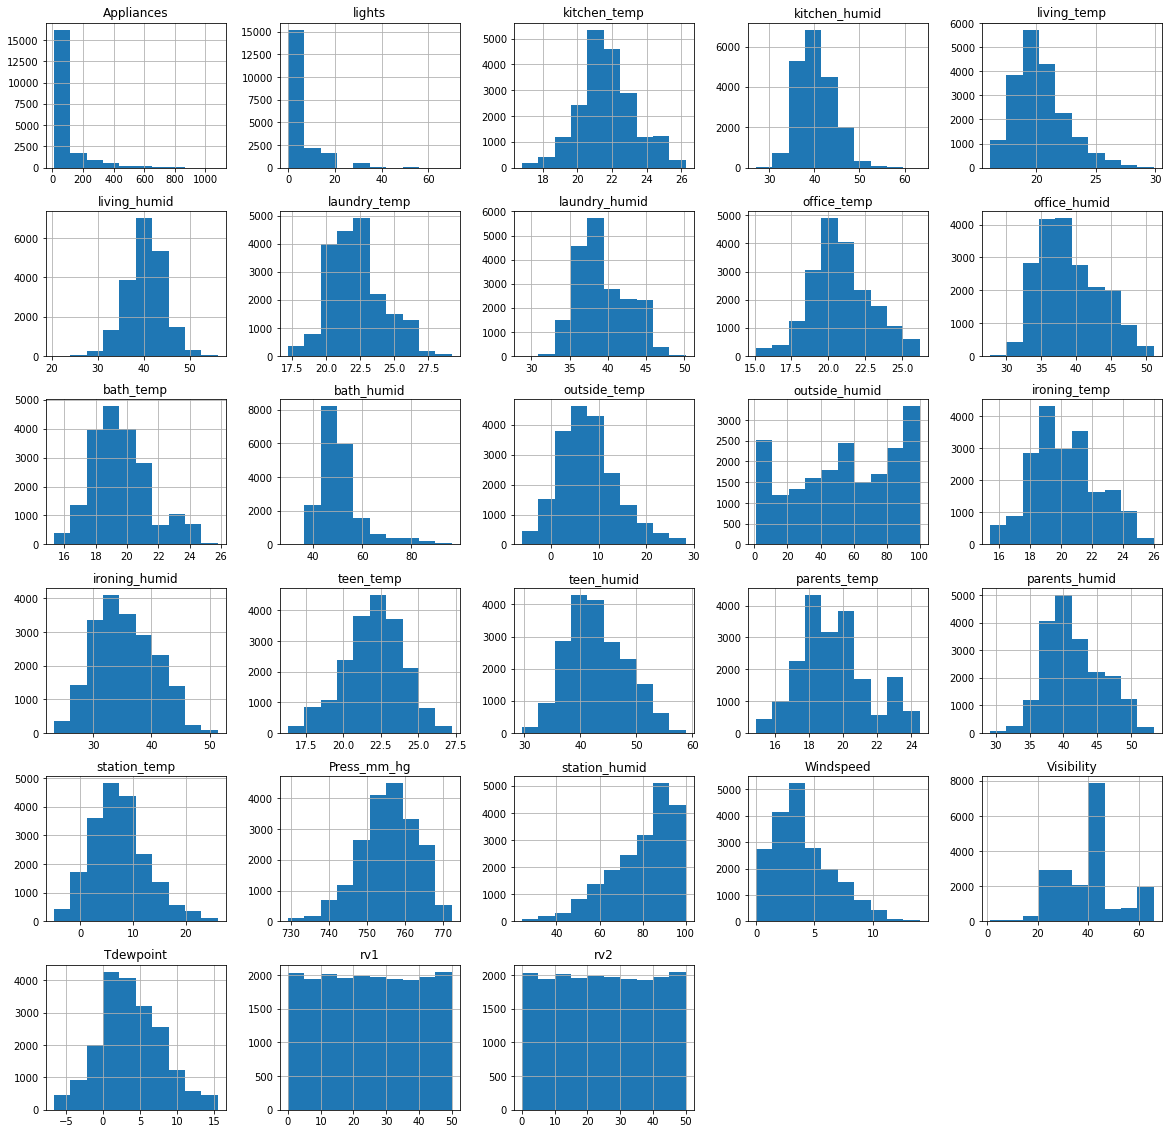

In [15]:
p = energy.hist(figsize = (20,20))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

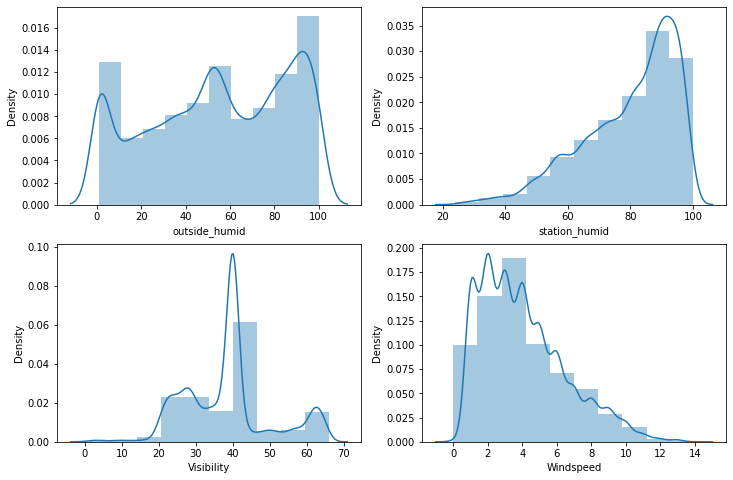

In [16]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(energy["outside_humid"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(energy["station_humid"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(energy["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(energy["Windspeed"],bins=10, ax=ax[1][1])

***Observations⚡***

***Temperature*** - All the columns follow normal distribution except T9

***Humidity*** - All columns follow normal distribution except outside_humid and station_humid, primarly because these sensors are outside the house

***Visibilty*** - This column is negatively skewed

***Windspeed*** - This column is postively skewed

In [17]:
df.lights.value_counts()

0     15252
10     2212
20     1624
30      559
40       77
50        9
60        1
70        1
Name: lights, dtype: int64

As maximum value in lights attribute is 0, it wont be playing much role in our model. Hence we are dropping the lights attribute from our dataset.

In [18]:
energy = energy.drop('lights', axis=1)

In [19]:
energy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2'],
      dtype='object')

**Forming DataFrame**

We need to form a new DataFrame df_dateNappli with right attributes to plot graphs.

We take date and Appliances attributes into the df_dateNappli DataFrame. When we created the new DataFrame, date attribute's type has been changed to objects. Now we need to convert it back to datetime64[ns] type. Then we will set the new DataFrame's index as date.

In [20]:
df_dateNappli = pd.DataFrame({'date': energy['date'], 'Appliances': energy['Appliances']})
df_dateNappli.date=df_dateNappli.date.astype('datetime64[ns]')
df_dateNappli.set_index('date', inplace=True)

**Energy consumption**

**Appliances energy consumption measurement for the whole period**

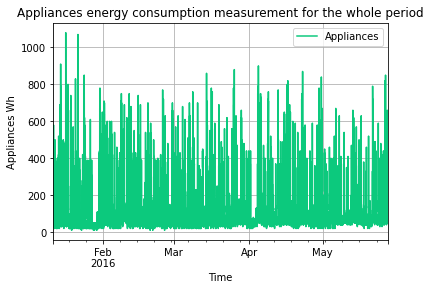

In [21]:
df_dateNappli.plot(color="#0cc97d")
plt.rcParams["figure.figsize"] = (22,10)
plt.grid()
plt.title('Appliances energy consumption measurement for the whole period')
plt.xlabel('Time')
plt.ylabel('Appliances Wh')
plt.show()

Here it shows the energy consumption profile for the period. The energy consumption profile shows a high variability. We can see from here that the highest Appliances Wh is around 1100 and it was in January month. Also, we can see that, at the end of January, February and March, there were big fall down in Appliances useage.

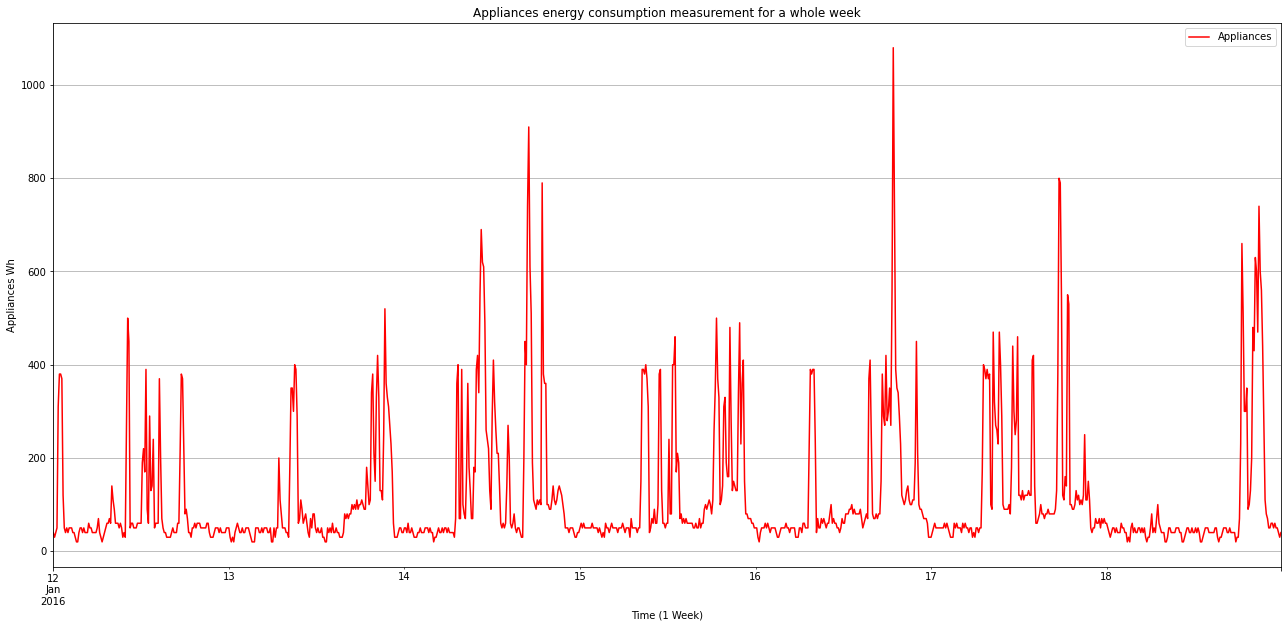

In [22]:
df_dateNappli['2016-01-12':'2016-01-18'].plot(color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()

**Insights⚡**: 

Can see from here that the highest Appliances Wh is around 1100 and it was on 16th of January. Also, we can see that, it follows a bit of a pattern though it is not a strong one.

**Energy Consumption pattern of the household at different times of the day over different time periods**

In [23]:
energy['weekday'] = ((pd.to_datetime(energy['date']).dt.dayofweek)// 5 == 0).astype(int)
energy['hour'] = pd.to_datetime(energy['date']).dt.hour
energy['month'] = pd.to_datetime(energy['date']).dt.month

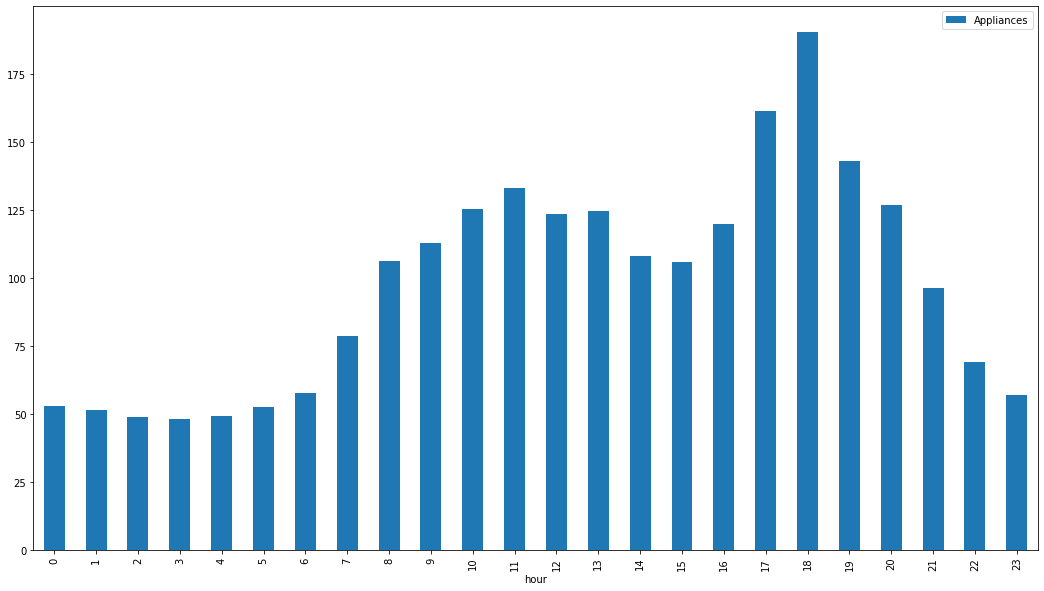

In [24]:
energy.groupby('hour').agg({'Appliances' : 'mean'}).plot.bar()

**Insights ⚡**: Above figure is a representation of average energy consumption of appliances at different time of the day over a period of 4.5 months. We observe two peak hours. One at 11 am in the morning and other at 6 PM in the evening. While the peak at 11 am is shallow and low, peak at 6 PM is comparatively higher and sharper.

We observe that over the sleeping hours (10 PM - 6 AM) the energy consumption of appliances is around 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM.

**What about weekdays and weekends?**

In [25]:
# Adding column to mark weekdays (0) and weekends(1) for time series evaluation

energy['WEEKDAY'] = ((pd.to_datetime(energy['date']).dt.dayofweek)// 5 == 1).astype(float)
# There are 5472 weekend recordings 
energy['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

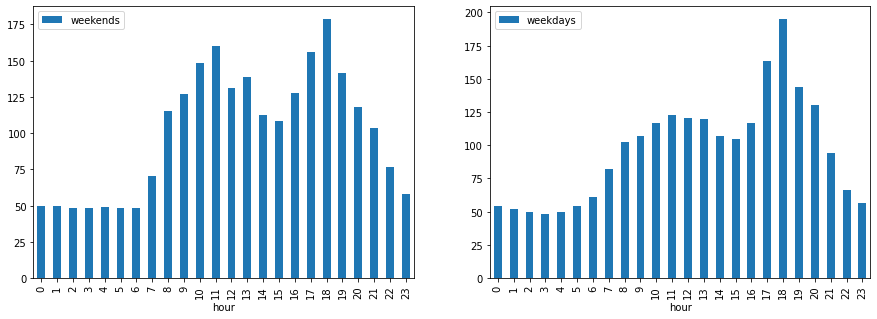

In [26]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
week_df = energy.groupby(['weekday','hour']).agg({'Appliances':'mean'}).reset_index(0)
week_df[week_df.weekday==0].Appliances.plot.bar(ax=ax[0], label='weekends')
week_df[week_df.weekday==1].Appliances.plot.bar(ax=ax[1], label='weekdays')
ax[0].legend(loc='best')
ax[1].legend(loc='best')

**Insights ⚡**: We observe that the energy consumption of appliances during the 8 AM - 4 PM is higher in weekends compared to the weekdays. Also, average overall consumption in weekends is pretty high.

**Appliances energy consumption distribution. The histogram shows the frequency of energy consumption in the interval.**

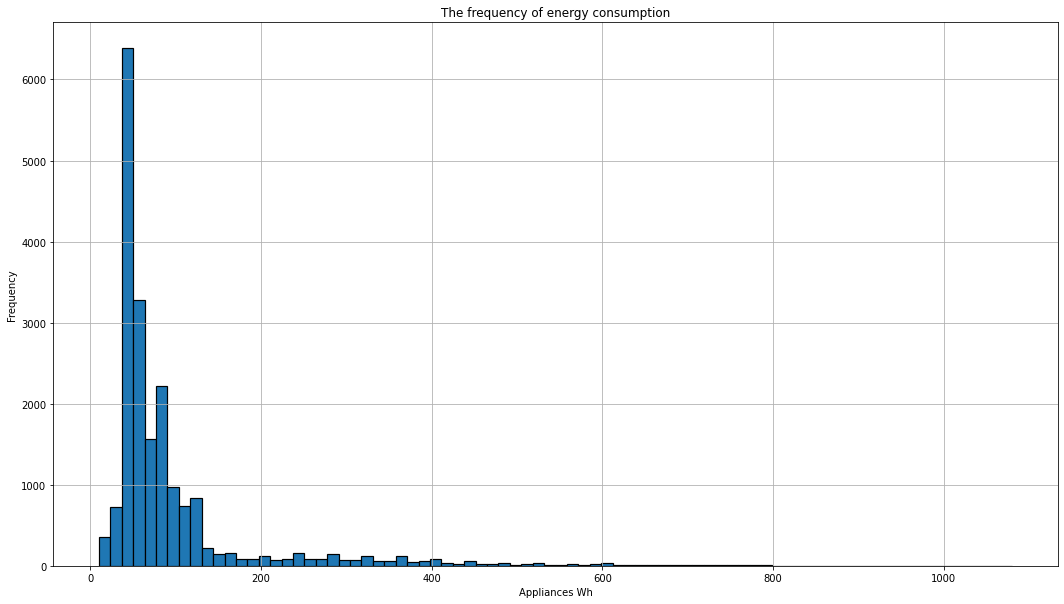

In [27]:
plt.hist(df_dateNappli.Appliances, bins=80, edgecolor='black', linewidth=1.2)
plt.rcParams["figure.figsize"] = (18,10)
plt.title('The frequency of energy consumption')
plt.grid()
plt.xlabel('Appliances Wh')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



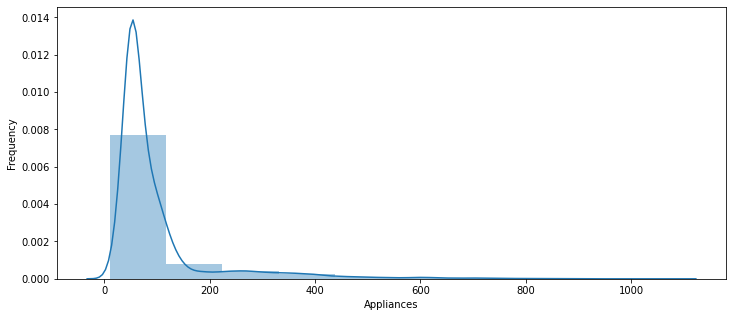

In [28]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(energy['Appliances'] , bins=10 )

In [29]:
target_var = energy['Appliances']

In [30]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_var[target_var <= 200].count()) / (len(target_var)))*100 )

Percentage of the appliance consumption is less than 200 Wh
90.29136052698252


**Insights⚡**:

1. 90% of Appliance consumption is less than 200 Wh . 

2. This column is postively skewed , most the values are around mean 100 Wh .

3. There will be outliers in this column.

4. There are small number of cases where consumption is very high.

**The boxplot shows the location of the median with the black line.**

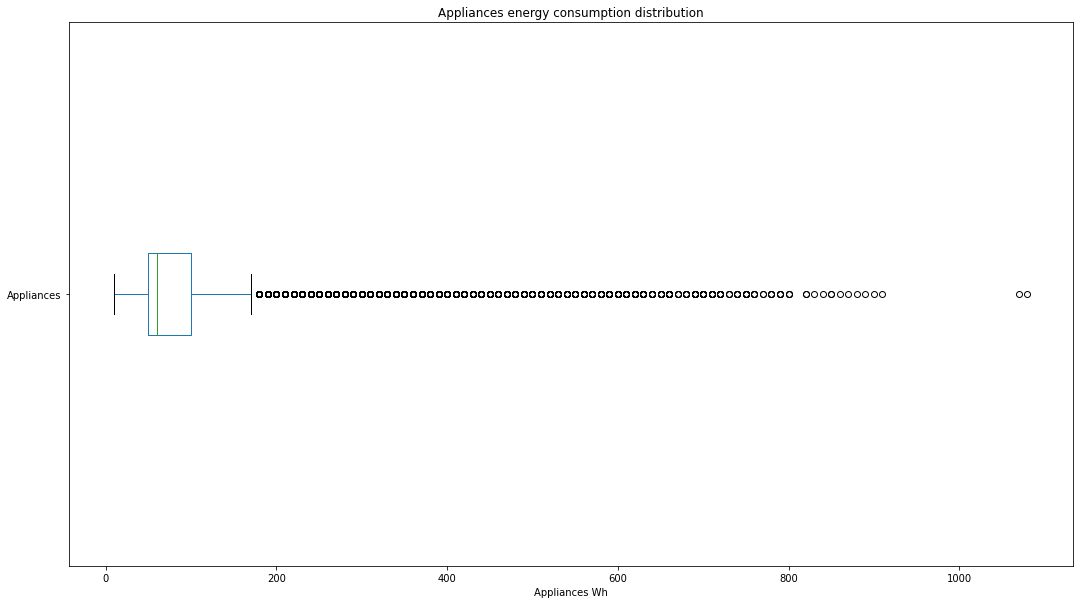

In [31]:
ax = df_dateNappli.Appliances.plot.box(vert=False)
plt.xlabel('Appliances Wh')
plt.title('Appliances energy consumption distribution')
plt.show()

In [32]:
energy[temp.values()].describe()

,kitchen_temp,living_temp,laundry_temp,office_temp,bath_temp,outside_temp,ironing_temp,teen_temp,parents_temp,station_temp
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,20.341219,22.267611,20.855335,19.592106,7.910939,20.267106,22.029107,19.485828,7.411665
std,1.606066,2.192974,2.006111,2.042884,1.844623,6.090347,2.109993,1.956162,2.014712,5.317409
min,16.790000,16.100000,17.200000,15.100000,15.330000,-6.065000,15.390000,16.306667,14.890000,-5.000000
25%,20.760000,18.790000,20.790000,19.530000,18.277500,3.626667,18.700000,20.790000,18.000000,3.666667
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.033333,22.100000,19.390000,6.916667
75%,22.600000,21.500000,23.290000,22.100000,20.619643,11.256000,21.600000,23.390000,20.600000,10.408333
max,26.260000,29.856667,29.236000,26.200000,25.795000,28.290000,26.000000,27.230000,24.500000,26.100000


**Observations**⚡:

1. Outside Average temperature over a period of 4.5 months is around 7.5 degrees and ranges from -6(min) to 28(max) degrees.

2. Inside the building avarage temperature has been around 20 degrees for all the rooms and ranges from 14(min) to 30(max) degrees.

**Note**: These points implies that warming appliances have been used to keep the insides of the building warm. There must be some sort of direct correlation b/w temperature and consumption of energy inside the house.

In [33]:
energy[humid.values()].describe()

,kitchen_humid,living_humid,laundry_humid,office_humid,bath_humid,outside_humid,ironing_humid,teen_humid,parents_humid,station_humid
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,40.259739,40.420420,39.242500,39.026904,50.949283,54.609083,35.388200,42.936165,41.552401,79.750418
std,3.979299,4.069813,3.254576,4.341321,9.022034,31.149806,5.114208,5.224361,4.151497,14.901088
min,27.023333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,24.000000
25%,37.333333,37.900000,36.900000,35.530000,45.400000,30.025000,31.500000,39.066667,38.500000,70.333333
50%,39.656667,40.500000,38.530000,38.400000,49.090000,55.290000,34.863333,42.375000,40.900000,83.666667
75%,43.066667,43.260000,41.760000,42.156667,53.663333,83.226667,39.000000,46.536000,44.338095,91.666667
max,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,100.000000


***Observations*** :

Outside the building average humidity ***>*** average humidity inside the house.

Average humidity at the weather station ***>*** outside humidity near the building.

Average humidity in the bathroom ***>*** other rooms due to obvious reasons.

Kids and parent room show a comparatively higher average humidity.

**Exploratory data analysis**

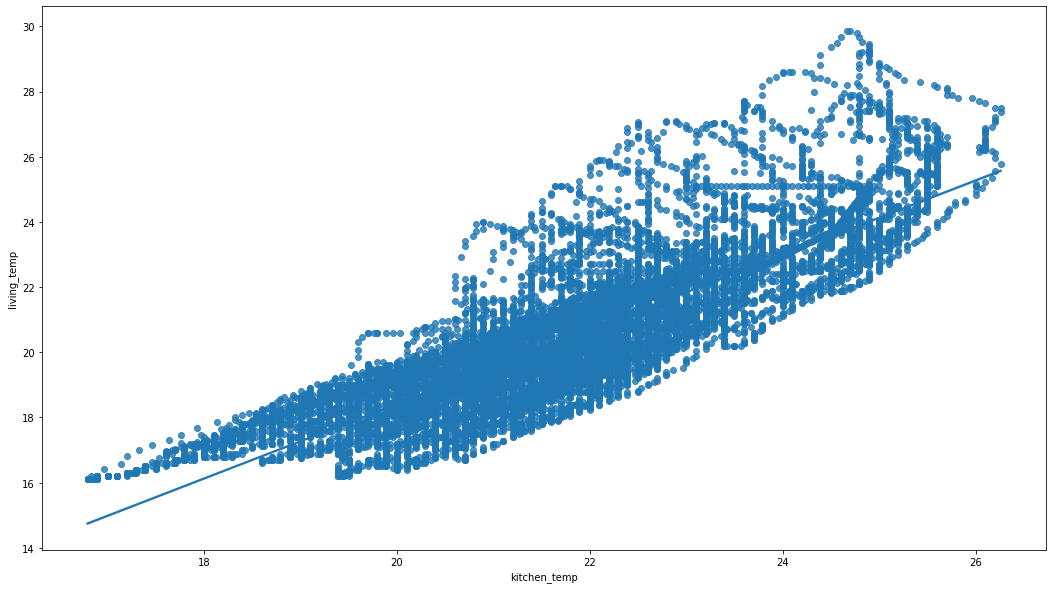

In [34]:
sns.regplot(x=energy['kitchen_temp'], y=energy['living_temp'])

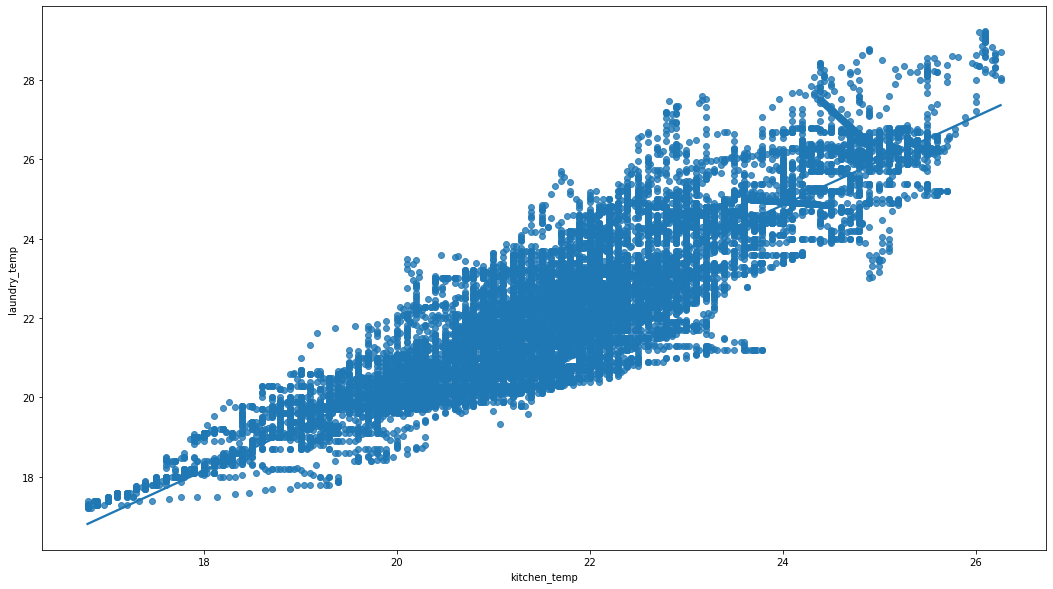

In [35]:
sns.regplot(x=energy['kitchen_temp'], y=energy['laundry_temp'])

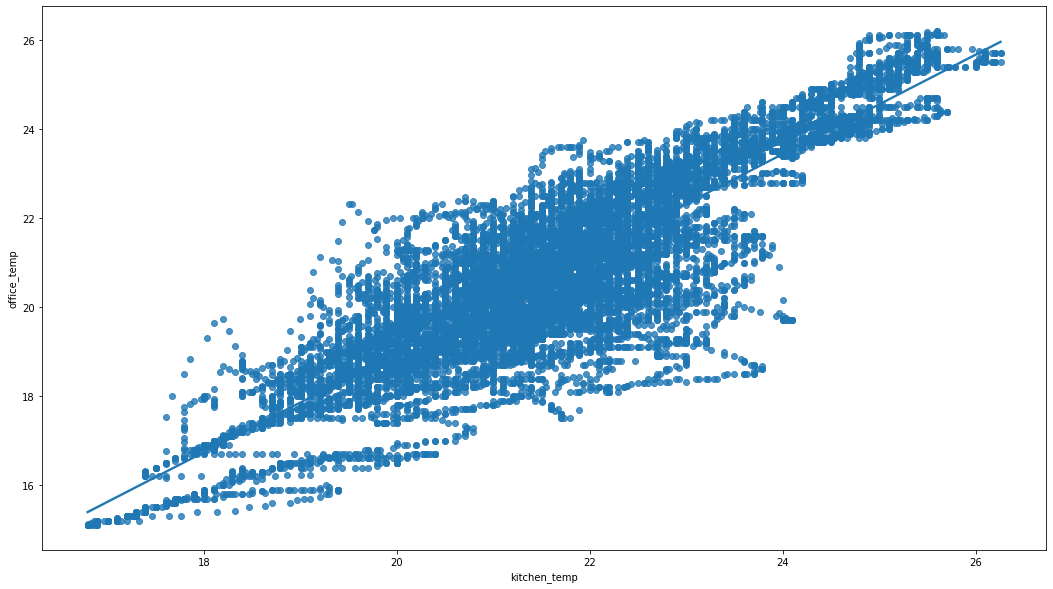

In [36]:
sns.regplot(x=energy['kitchen_temp'], y=energy['office_temp'])

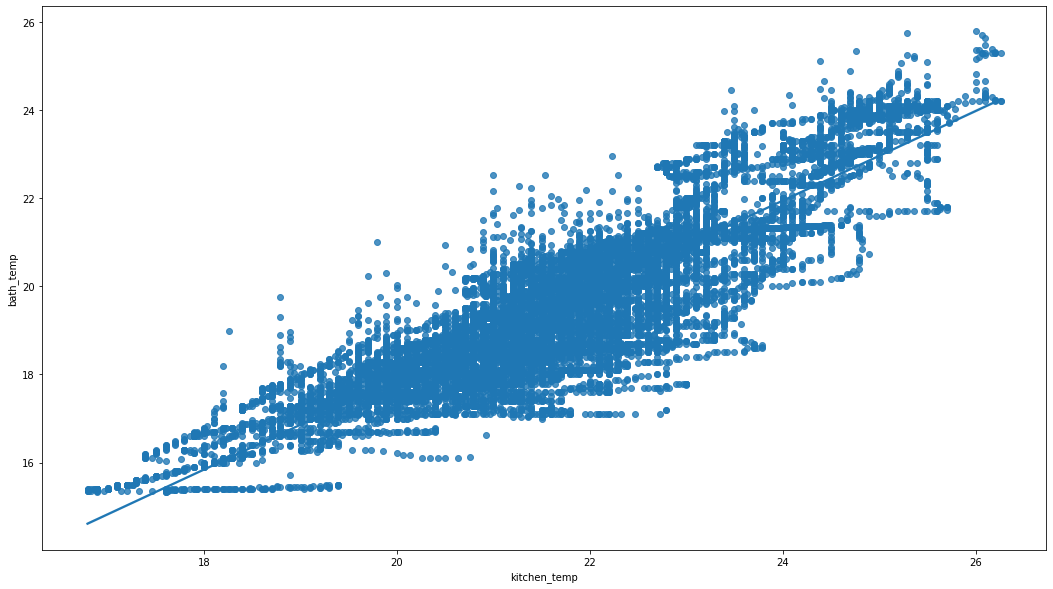

In [37]:
sns.regplot(x=energy['kitchen_temp'], y=energy['bath_temp'])

In [38]:
from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(energy,test_size=0.25,random_state=40)

In [39]:
train

,date,Appliances,kitchen_temp,kitchen_humid,living_temp,living_humid,laundry_temp,laundry_humid,office_temp,office_humid,bath_temp,bath_humid,outside_temp,outside_humid,ironing_temp,ironing_humid,teen_temp,teen_humid,parents_temp,parents_humid,station_temp,Press_mm_hg,station_humid,Windspeed,Visibility,Tdewpoint,rv1,rv2,weekday,hour,month,WEEKDAY
9544,2016-03-17 23:40:00,70,22.600,34.700000,19.500000,37.863333,21.500000,35.345000,22.890000,33.663333,19.166667,71.263333,2.863333,57.826667,21.000000,26.890000,22.890000,38.500000,19.890000,37.260000,2.233333,764.200000,87.666667,1.333333,61.000000,0.400000,43.195492,43.195492,1,23,3,0.0
19366,2016-05-25 04:40:00,50,23.700,40.290000,21.000000,42.900000,25.390000,40.000000,23.600000,39.000000,19.890000,37.900000,5.500000,39.890000,23.000000,35.090000,24.200000,43.400000,22.600000,44.590000,6.266667,757.233333,93.666667,1.000000,25.333333,5.300000,46.369677,46.369677,1,4,5,0.0
10816,2016-03-26 19:40:00,100,22.200,45.800000,20.463333,44.930000,23.000000,38.560000,20.390000,43.596667,19.856667,50.026667,13.566667,33.500000,20.890000,37.000000,23.633333,43.800000,19.963333,41.363333,13.366667,750.133333,66.333333,6.333333,40.000000,7.133333,25.722968,25.722968,0,19,3,1.0
15457,2016-04-28 01:10:00,40,21.290,35.790000,18.230000,37.863333,21.290000,34.790000,20.533333,35.326667,19.290000,59.990000,0.066667,51.160000,19.500000,29.700000,22.200000,42.950000,18.890000,35.863333,0.316667,755.216667,94.333333,2.000000,20.166667,-0.450000,3.791656,3.791656,1,1,4,0.0
2956,2016-02-01 05:40:00,50,21.290,47.400000,20.290000,47.290000,21.666667,46.760000,18.790000,49.200000,19.475556,52.175556,10.800000,99.900000,19.044444,51.025000,20.926667,57.500000,17.600000,52.900000,10.766667,758.666667,92.666667,6.666667,59.000000,9.633333,8.706206,8.706206,1,5,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,2016-03-31 19:00:00,100,21.760,41.933333,20.000000,43.163333,22.000000,38.466667,20.600000,40.700000,20.100000,48.500000,8.226667,56.326667,20.200000,33.790000,24.463333,39.693333,20.000000,38.863333,8.100000,754.800000,82.000000,2.000000,40.000000,5.200000,36.275509,36.275509,1,19,3,0.0
16065,2016-05-02 06:30:00,80,21.200,36.433333,18.000000,40.200000,22.100000,35.090000,20.260000,34.363333,19.600000,46.290000,1.730000,40.193333,19.290000,29.700000,22.290000,41.566667,19.600000,39.480000,1.750000,764.700000,92.500000,1.000000,27.500000,0.650000,37.879262,37.879262,1,6,5,0.0
14501,2016-04-21 09:50:00,50,21.600,37.466667,22.200000,35.700000,22.700000,35.700000,22.390000,34.790000,20.000000,45.433333,13.066667,6.696667,21.290000,32.290000,21.500000,39.200000,20.290000,37.900000,9.966667,762.616667,67.500000,4.000000,27.166667,4.100000,22.496162,22.496162,1,9,4,0.0
14555,2016-04-21 18:50:00,120,23.175,37.722500,22.856667,35.560000,23.290000,36.590000,22.890000,34.507500,21.166667,40.333333,18.600000,1.000000,22.238571,30.057143,22.823333,38.433333,20.200000,36.363333,17.366667,759.633333,47.500000,4.000000,38.166667,5.916667,32.362623,32.362623,1,18,4,0.0


**Lets look at correlation matrix of temperature and humidity levels**

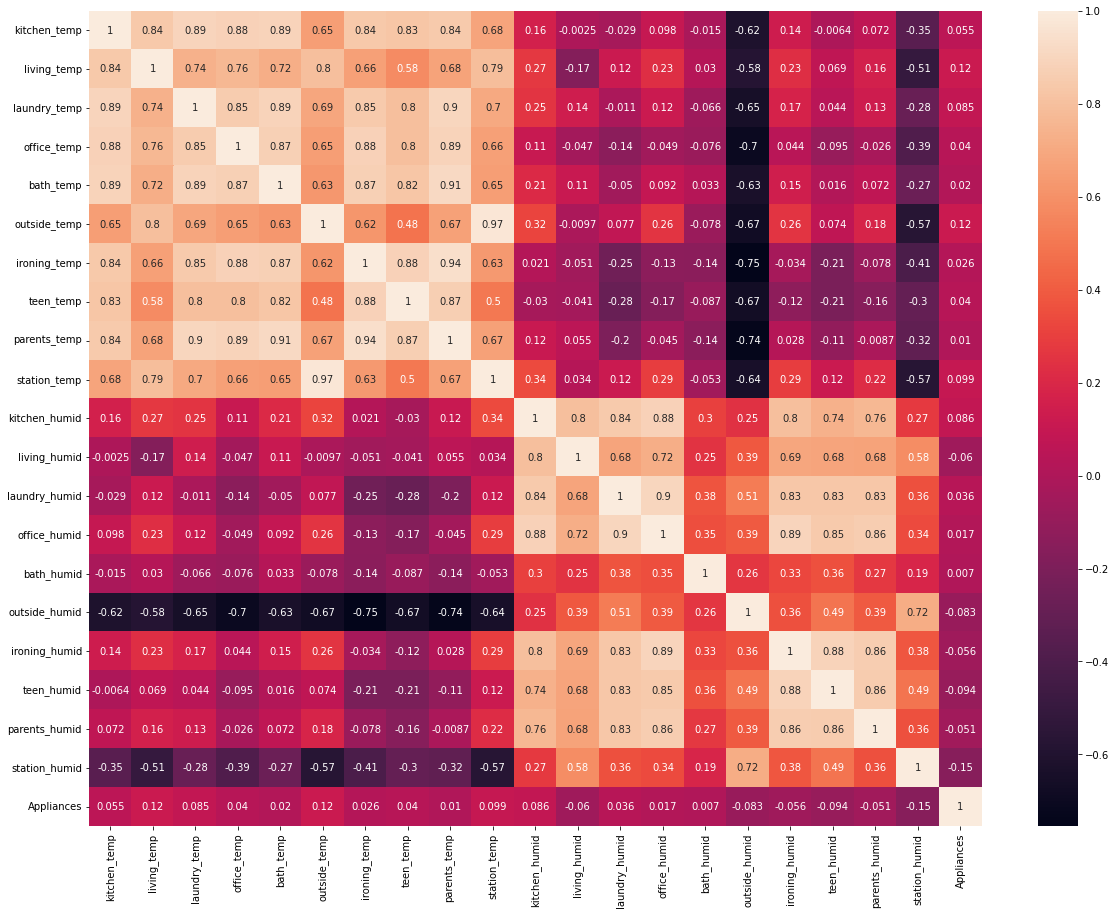

In [40]:
cols = list(temp.values())
cols.extend(list(humid.values()))
cols.extend(['Appliances'])
fig, ax = plt.subplots(1,1,figsize=(20,15))
sns.heatmap(energy[cols].corr(), ax=ax, annot=True)

***OBSERVATIONS*** ⚡:

1. From the correlation graph we clearly observe that the features related to temperature and features related to humidity have positive correlation within themselves whereas have a a very low or negative correlation with each other.

2. Humidity outside have a strong negative correlation with temperature levels.

3. Apart from that we observe that a couple features such as humidity at station, temperature outside the building and temperature in the living room have a comparatively high absolute correlation (above 0.12) with Appliances energy consumption.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [42]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from tensorflow.keras import Sequential, layers, Input

In [43]:
warnings.filterwarnings('ignore')

In [44]:
# from sklearn.model_selection import train_test_split

# # 75% of the data is usedfor the training of the models and the rest is used for testing
# train, test = train_test_split(energy,test_size=0.25,random_state=40)

In [45]:
test.shape

(4934, 32)

## ***Data Pre Processing***

**Given this is not a timeseries problem and we will focus on predicting the appliance consumption , we can ignore Date column.**

In [46]:
humid.values()

dict_values(['kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid', 'station_humid'])

In [47]:
temp.values()

dict_values(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp', 'station_temp'])

In [48]:
energy.columns

Index(['date', 'Appliances', 'kitchen_temp', 'kitchen_humid', 'living_temp',
       'living_humid', 'laundry_temp', 'laundry_humid', 'office_temp',
       'office_humid', 'bath_temp', 'bath_humid', 'outside_temp',
       'outside_humid', 'ironing_temp', 'ironing_humid', 'teen_temp',
       'teen_humid', 'parents_temp', 'parents_humid', 'station_temp',
       'Press_mm_hg', 'station_humid', 'Windspeed', 'Visibility', 'Tdewpoint',
       'rv1', 'rv2', 'weekday', 'hour', 'month', 'WEEKDAY'],
      dtype='object')

In [49]:
# Divide the columns based on type for clear column management 

col_temp = ['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp', 'bath_temp', 'outside_temp', 'ironing_temp', 'teen_temp', 'parents_temp']

col_hum = ['kitchen_humid', 'living_humid', 'laundry_humid', 'office_humid', 'bath_humid', 'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid']

col_weather = ['station_temp', 'Tdewpoint','station_humid',"Press_mm_hg",
                "Windspeed","Visibility"] 

col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

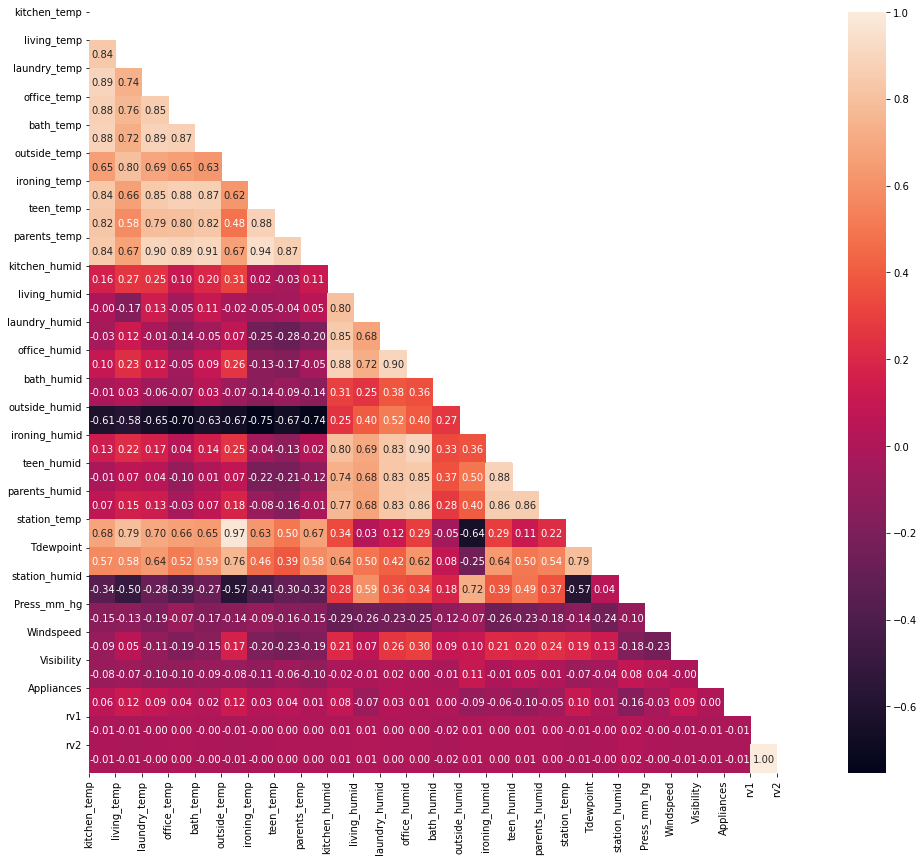

In [64]:
# Use the weather , temperature , applainces and random column to see the correlation
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [65]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))

Top Absolute Correlations
rv1            rv2              1.000000
outside_temp   station_temp     0.974683
ironing_temp   parents_temp     0.943921
bath_temp      parents_temp     0.910009
laundry_temp   parents_temp     0.900209
laundry_humid  office_humid     0.899889
office_humid   ironing_humid    0.895120
kitchen_temp   laundry_temp     0.892292
office_temp    parents_temp     0.888264
laundry_temp   bath_temp        0.887545
ironing_humid  teen_humid       0.884849
kitchen_temp   bath_temp        0.884692
ironing_temp   teen_temp        0.881513
kitchen_humid  office_humid     0.880504
kitchen_temp   office_temp      0.876682
office_temp    ironing_temp     0.876677
               bath_temp        0.871733
bath_temp      ironing_temp     0.869655
teen_temp      parents_temp     0.868251
ironing_humid  parents_humid    0.860155
office_humid   parents_humid    0.858454
teen_humid     parents_humid    0.857476
laundry_temp   office_temp      0.851790
office_humid   teen_humid      

**Observations based on correlation plot**

Temperature - All the temperature variables  have positive correlation with the target Appliances . 

Four columns have a high degree of correlation with parents_temp - laundry_temp, bath_temp, ironing_temp & teen_temp and also outside_temp & station_temp has high correlation (both temperatures from outside) . Hence outside_temp & parents_temp can be removed from training set as information provided by them can be provided by other fields.

Weather attributes - Visibility, Tdewpoint, Press_mm_hg have low correlation values so all will be dropped.

Humidity - office_humid highly correlates with laundry, ironing, kitchen, parent_humid's so office_humid will be dropped

Random variables have no role to play so they will be dropped

In [68]:
# Let us perform data pre-processing now
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_randoms]
target_vars = train[col_target]


In [69]:
# Split test and train into independent and dependent varibales

train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [70]:
feature_vars.describe()

,kitchen_temp,living_temp,laundry_temp,office_temp,bath_temp,outside_temp,ironing_temp,teen_temp,parents_temp,kitchen_humid,living_humid,laundry_humid,office_humid,bath_humid,outside_humid,ironing_humid,teen_humid,parents_humid,station_temp,Tdewpoint,station_humid,Press_mm_hg,Windspeed,Visibility,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,40.432370,39.252994,39.041339,50.939261,54.596942,35.401239,42.944133,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,4.081775,3.263513,4.355528,8.964531,31.163493,5.134281,5.240388,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,20.463333,28.766667,27.660000,29.815000,1.000000,23.200000,29.600000,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,37.900000,36.900000,35.530000,45.400000,30.023333,31.500000,39.069091,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,40.500000,38.560000,38.400000,49.090000,55.290000,34.900000,42.397143,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,43.290000,41.790000,42.193333,53.694286,83.126667,39.000000,46.560000,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,56.026667,50.163333,51.090000,96.321667,99.900000,51.400000,58.780000,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,49.993173,49.993173


In [71]:
# Due to conlusion made above below columns are removed
train_X.drop(["rv1","rv2","Visibility","outside_temp","parents_temp","Tdewpoint","Press_mm_hg"],axis=1 , inplace=True)
test_X.drop(["rv1","rv2","Visibility","outside_temp","parents_temp","Tdewpoint","Press_mm_hg"], axis=1, inplace=True)

In [72]:
train_X.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'ironing_temp', 'teen_temp', 'kitchen_humid',
       'living_humid', 'laundry_humid', 'office_humid', 'bath_humid',
       'outside_humid', 'ironing_humid', 'teen_humid', 'parents_humid',
       'station_temp', 'station_humid', 'Windspeed'],
      dtype='object')

In [73]:
train_X.drop(["office_humid"],axis=1 , inplace=True)
test_X.drop(["office_humid"], axis=1, inplace=True)

In [74]:
train_X.columns

Index(['kitchen_temp', 'living_temp', 'laundry_temp', 'office_temp',
       'bath_temp', 'ironing_temp', 'teen_temp', 'kitchen_humid',
       'living_humid', 'laundry_humid', 'bath_humid', 'outside_humid',
       'ironing_humid', 'teen_humid', 'parents_humid', 'station_temp',
       'station_humid', 'Windspeed'],
      dtype='object')

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = ss.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = ss.fit_transform(test)

In [76]:
sc_train.head()

,kitchen_temp,living_temp,laundry_temp,office_temp,bath_temp,ironing_temp,teen_temp,kitchen_humid,living_humid,laundry_humid,bath_humid,outside_humid,ironing_humid,teen_humid,parents_humid,station_temp,station_humid,Windspeed,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,0.349500,0.441571,-1.398755,-0.629413,-1.197521,2.267242,0.103642,-1.657784,-0.848083,-1.033732,-0.978251,0.529878,-1.112160,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,1.299615,1.112907,0.004687,0.604569,0.228904,-1.454588,-0.471944,-0.060622,0.086994,0.725258,-0.217827,0.931169,-1.248270,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.297243,0.822507,1.388043,1.101918,-0.212353,-0.101804,-0.676999,0.311400,0.163327,-0.049050,1.120770,-0.896934,0.929492,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-0.363087,0.087967,-1.125096,-0.629413,-1.367589,1.009651,-0.110291,-1.110463,0.001120,-1.368892,-1.339609,0.975757,-0.839939,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,-0.579502,-0.564579,1.789743,1.680118,2.300361,0.137914,1.453771,3.043131,2.777725,2.719419,0.630579,0.864287,1.065602,-0.464759


In [77]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

Model Implementation

In [78]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [79]:
models = [
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
         ]

In [81]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing, model_selection, metrics

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Train_RMSE_Score"] = sqrt(mean_squared_error(train_y,curr_model.predict(train_X)))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [82]:
model_data

[{'Name': 'Ridge: ',
  'Test_R2_Score': 0.1210915077179543,
  'Test_RMSE_Score': 0.937501195882995,
  'Train_R2_Score': 0.13602510849475968,
  'Train_RMSE_Score': 0.9295024967719239,
  'Train_Time': 0.0066416263580322266},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.48518750451998105,
  'Test_RMSE_Score': 0.7175043522376843,
  'Train_R2_Score': 0.6796399722210325,
  'Train_RMSE_Score': 0.5660035580974447,
  'Train_Time': 0.0034105777740478516},
 {'Name': 'SVR:',
  'Test_R2_Score': 0.20073761032146675,
  'Test_RMSE_Score': 0.8940147592062075,
  'Train_R2_Score': 0.22696064499833934,
  'Train_RMSE_Score': 0.879226566364814,
  'Train_Time': 10.777125358581543},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.5540833136042074,
  'Test_RMSE_Score': 0.6677699352290373,
  'Train_R2_Score': 0.9380942312158606,
  'Train_RMSE_Score': 0.24880869917295786,
  'Train_Time': 24.248307943344116},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.6319330407604206,
  'Test_RMSE_Score': 

In [83]:
results_df = df = pd.DataFrame(model_data)

In [84]:
results_df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Train_RMSE_Score,Test_RMSE_Score
0,Ridge:,0.006642,0.136025,0.121092,9.295025e-01,0.937501
1,KNeighborsRegressor:,0.003411,0.679640,0.485188,5.660036e-01,0.717504
2,SVR:,10.777125,0.226961,0.200738,8.792266e-01,0.894015
3,RandomForest,24.248308,0.938094,0.554083,2.488087e-01,0.667770
4,ExtraTreeRegressor :,6.349224,1.000000,0.631933,1.307647e-15,0.606685


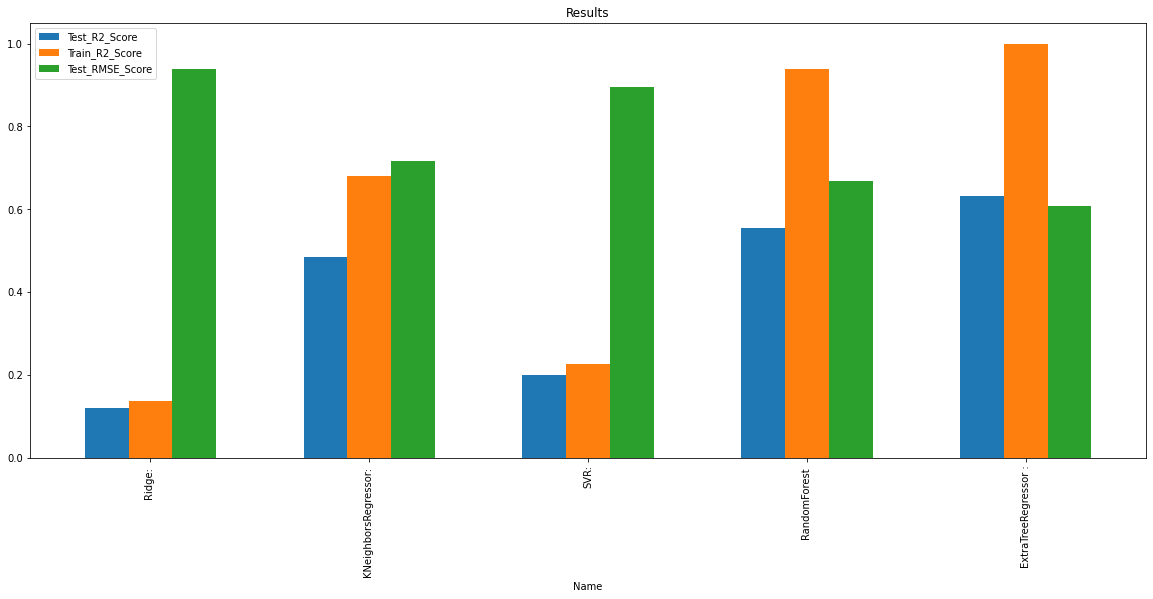

In [85]:
results_df.plot.bar(x="Name", y=['Test_R2_Score' , 'Train_R2_Score', 'Test_RMSE_Score'], title = 'Results' , width = .6, figsize= (20,8))

Parameter Tuning

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [5, 10, 20, 30, 40, 50 ,60],
              'n_estimators' : [50, 100, 150, 200, 250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 105 candidates, totalling 525 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_depth': [5, 10, 20, 30, 40, 50, 60],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [50, 100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [87]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 60, 'max_features': 'sqrt', 'n_estimators': 250}

In [88]:
grid_search.best_estimator_.score(train_X,train_y)

1.0

In [89]:
grid_search.best_estimator_.score(test_X,test_y)

0.6370072805589627

In [90]:
# RMSE score on test set with tuned parameters
np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.6024887712157275